## IMPORT LIBRARY

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## BUKA GAMBAR

In [2]:

img = Image.open('family.jpg')
img = img.convert('RGB')
width, height = img.size

In [3]:
rgb = np.array(img)
rgb

array([[[253, 253, 251],
        [253, 253, 251],
        [253, 253, 251],
        ...,
        [253, 253, 251],
        [253, 253, 251],
        [253, 253, 251]],

       [[253, 253, 251],
        [253, 253, 251],
        [253, 253, 251],
        ...,
        [253, 253, 251],
        [253, 253, 251],
        [253, 253, 251]],

       [[253, 253, 251],
        [253, 253, 251],
        [253, 253, 251],
        ...,
        [253, 253, 251],
        [253, 253, 251],
        [253, 253, 251]],

       ...,

       [[251, 252, 246],
        [251, 252, 244],
        [251, 252, 246],
        ...,
        [253, 253, 251],
        [253, 253, 251],
        [253, 253, 251]],

       [[251, 252, 244],
        [251, 252, 244],
        [251, 252, 244],
        ...,
        [253, 253, 251],
        [253, 253, 251],
        [253, 253, 251]],

       [[251, 252, 244],
        [251, 252, 244],
        [251, 252, 244],
        ...,
        [253, 253, 251],
        [253, 253, 251],
        [253, 253, 251]]

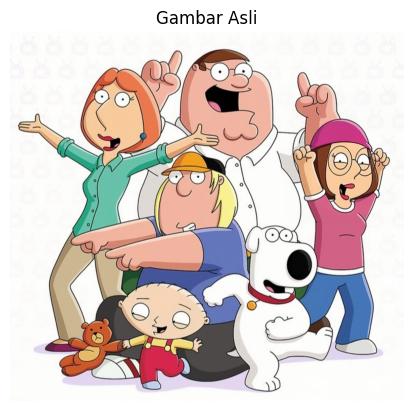

In [4]:
plt.imshow(rgb)
plt.axis('off') 
plt.title('Gambar Asli')
plt.show()

## KONVERSI GRAYSCALE

In [5]:
def convert_to_grayscale(pixel):
    r, g, b = pixel
    gray = int(0.299 * r + 0.587 * g + 0.114 * b)
    return gray

In [6]:
grayscale_img = []
for y in range(height):
    row = []
    for x in range(width):
        pixel = rgb[y, x]
        index = convert_to_grayscale(pixel)
        row.append(index)
    grayscale_img.append(row)

grayscale_img = np.array(grayscale_img)
grayscale_img

array([[252, 252, 252, ..., 252, 252, 252],
       [252, 252, 252, ..., 252, 252, 252],
       [252, 252, 252, ..., 252, 252, 252],
       ...,
       [251, 250, 251, ..., 252, 252, 252],
       [250, 250, 250, ..., 252, 252, 252],
       [250, 250, 250, ..., 252, 252, 252]])

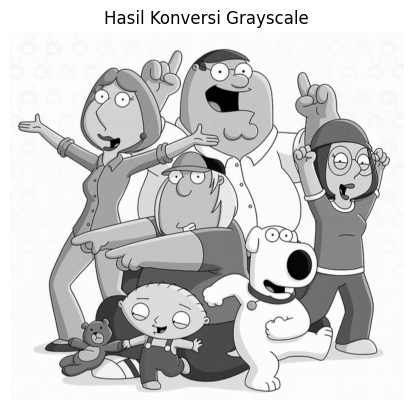

In [7]:
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.title('Hasil Konversi Grayscale')
plt.show()

## OPERASI LAPLACIAN

#### KERNEL LAPLACIAN

In [8]:
Laplacian = [[0,  1, 0],
             [1, -4, 1],
             [0,  1, 0]]

#### OPERASI LAPLACIAN

In [9]:
def apply_laplacian_operator(img):
    gradient_magnitude = np.zeros((height, width), dtype=np.uint8)

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            laplacian_sum = 0

            for i in range(3):
                for j in range(3):
                    pixel = img[y + i - 1, x + j - 1]
                    laplacian_sum += Laplacian[i][j] * pixel

            value = abs(laplacian_sum)
            gradient_magnitude[y, x] = min(int(value), 255)

    return gradient_magnitude

In [10]:
edges = apply_laplacian_operator(grayscale_img)
edges = np.array(edges)
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 3, 1, ..., 1, 1, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

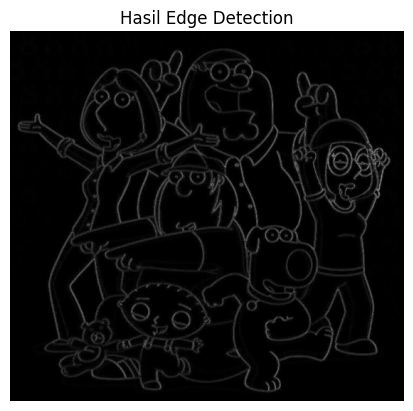

In [11]:
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Hasil Edge Detection')
plt.show()